# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [37]:
medical.shape

(1338, 8)

In [38]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [39]:
charges = medical['charges']
charges.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

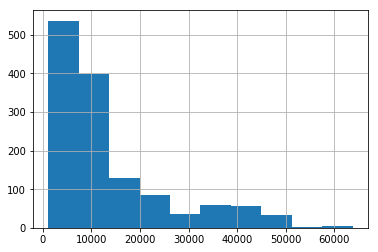

In [40]:
charges.hist()

In [41]:
charges_mean = np.mean(charges)
charges_mean

13270.422265141257

In [42]:
charges_std = np.std(charges, ddof=1)
charges_std

12110.011236693994

Using a degree of freedom of 1 in the calculation of the standard deviation is appropriate, as this is a sample from a larger population and we want to prevent bias in the calculation of the standard deviation. However, the fact that the sample mean charge is $13,270 and the sample standard deviation is $12,110 shows us that this sample is very skewed. That is, there is space for just slightly over one standard deviation less than the sample mean, but there is room for several standard deviations more than the sample mean. 

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The calculated sample mean is only $1,270.42 more than the $12,000 threshold, or 11% more. This is close enough to be of concern. It would be advised to take more samples, but if we cannot, a z-test would be suggested as the sample is rather large (n=1,338). However, we do not know the population standard deviation, so it would be more advised to conduct a t-test in order to see if the sample mean falls within calculated confidence intervals based on the t-statistic.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ 

Since the administrator's concern is that the average charge has fallen below $12,000 and the sample mean is more than that, a one-sided confidence interval is suggested to determine whether it is probable that the true average charge falls below $12,000.

In [43]:
dof = 1338 - 1 #sample size of 1,338 minus 1
dof

1337

In [44]:
critical_value = t(dof).ppf([0.025])
critical_value

array([-1.96173989])

In [45]:
#the critical value from the t-table is -1.96
#now, divide sample standard deviation by the square root of the sample size (n=1,338)
multiplier = charges_std / np.sqrt(1338)
multiplier

331.06745431568226

In [46]:
#multiply critical value by the multiplier (standard deviaton/square root of n) to obtain the 2.5% interval of
#the distribution
interval = critical_value * multiplier
interval

array([-649.46823095])

In [47]:
lower_bound_mean = charges_mean - abs(interval)
lower_bound_mean

array([12620.95403419])

Given a 95% confidence interval, the population mean is predicted to be no lower than $12,620.95. This is still above the threshold of concern of $12,000, so the administrator need not be concerned about her hospital's financial model... yet.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance are not charged a different amount to those without.   The alternative hypothesis is that people with insurance are charged a different amount to those without.

We're assuming that the sample variances are equal between the group with insurance and the group without insurance.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [48]:
medical['insuranceclaim'].value_counts()
#As the data is not labeled and there is no data dictionary, I'm assuming that 0 means people with insurance, 
#and 1 means people with no insurance. So there are 555 people with insurance and 783 people with no insurance 
#in the sample.

1    783
0    555
Name: insuranceclaim, dtype: int64

In [49]:
n_with_ins = 555 #this will be n1, the group with insurance
n_with_ins

555

In [50]:
n_wo_ins = 783 #this will be n0, the group without insurance.
n_wo_ins

783

In [51]:
#To calculate the statistics of interest for the two groups, we have to first subset one dataframe for those with 
#insurance and one for those without.
indices_ins = medical['insuranceclaim'] == 0
w_ins = medical.loc[indices_ins, :] #create a dataframe for those with insurance.

In [52]:
#verifying that all columns that are in the source dataframe are also in this subsetted dataframe 
#for those with insurance.
w_ins.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [53]:
#verifying that all values of 'insuranceclaim' in this subsetted dataframe are 1, matching the statistic for those
#with insurance
w_ins['insuranceclaim'].value_counts()

0    555
Name: insuranceclaim, dtype: int64

In [54]:
#subset a dataframe for those without insurance
indices_wo_ins = medical['insuranceclaim'] == 1
wo_ins = medical.loc[indices_wo_ins, :]

In [55]:
#verifying that all columns are in this subsetted dataframe for those without insurance
wo_ins.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [56]:
#verifying that all values of insuranceclaim in this subsetted dataframe are 0, matching the statistic for those
#without insurance
wo_ins['insuranceclaim'].value_counts()

1    783
Name: insuranceclaim, dtype: int64

In [57]:
#compute the mean charges for those with insurance
mean_charge_w_ins = np.mean(w_ins['charges'])
print("The mean charge for those with insurance is: $", round(mean_charge_w_ins, 2))

The mean charge for those with insurance is: $ 8821.42


In [58]:
#a series of equations to hand-calculate variance of those with insurance
ins_differences = w_ins['charges'] - mean_charge_w_ins #a series with differences between each charge of 
#those with insurance and the mean charge of those with insurance. 

In [59]:
ins_diff_sq = ins_differences**2 #to calculate the squared differences from the mean

In [60]:
ins_diff_sq_sum = np.sum(ins_diff_sq) #the sum, or sigma, of the squared differences from the mean
print("The sum of the square differences from the mean is: $", round(ins_diff_sq_sum, 2))

The sum of the square differences from the mean is: $ 23022851019.56


In [61]:
#variance for those with insurance
ins_var = ins_diff_sq_sum / n_with_ins
print("The variance in medical charges for those with insurance is: $", round(ins_var, 2))

The variance in medical charges for those with insurance is: $ 41482614.45


In [62]:
#standard deviation for those with insurance
std_ins = np.sqrt(ins_var)
print("The standard deviation in medical charges for those with insurance is: $", round(std_ins, 2))

The standard deviation in medical charges for those with insurance is: $ 6440.7


In [63]:
#compute the mean charges for those without insurance
mean_charge_wo_ins = np.mean(wo_ins['charges'])
print("The mean charge for those without insurance is: $", round(mean_charge_wo_ins, 2))

The mean charge for those without insurance is: $ 16423.93


In [64]:
#a series of equations to hand-calculate variance of those without insurance
wo_ins_differences = wo_ins['charges'] - mean_charge_wo_ins #a series with differences between each charge of 
#those without insurance and the mean charge of those without insurance.

In [65]:
wo_ins_diff_sq = wo_ins_differences**2 #to calculate the squared differences from the mean

In [66]:
wo_ins_diff_sq_sum = np.sum(wo_ins_diff_sq) #the sum, or sigma, of the squared differences from the mean
print("The sum of the square differences from the mean is: $", round(wo_ins_diff_sq_sum, 2))

The sum of the square differences from the mean is: $ 154279298224.26


In [67]:
#variance for those without insurance
wo_ins_var = wo_ins_diff_sq_sum / n_wo_ins
print("The variance in medical charges for those without insurance is: $", round(wo_ins_var, 2))

The variance in medical charges for those without insurance is: $ 197036140.77


In [68]:
std_wo_ins = np.sqrt(wo_ins_var)
print("The standard deviation in medical charges for those without insurance is: $", round(std_wo_ins))

The standard deviation in medical charges for those without insurance is: $ 14037.0


\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

In [73]:
std_pooled = np.sqrt(((n_with_ins - 1) * ins_var + (n_wo_ins - 1) * wo_ins_var) / (n_with_ins + n_wo_ins - 2))
std_pooled

11512.28289920575

In [74]:
calculated_t = (mean_charge_w_ins - mean_charge_wo_ins) / (std_pooled * np.sqrt((1/n_with_ins) + (1/n_wo_ins)))
calculated_t

-11.901306943555381

Given the t-value of -11.9 and the degrees of freedom of 1,336 (n-2), according to standard tables the p-value is greater than 4.

In [75]:
#calculated through scipy function 
scipy.stats.ttest_ind_from_stats(mean_charge_w_ins, std_ins, n_with_ins, mean_charge_wo_ins, std_wo_ins, n_wo_ins)

Ttest_indResult(statistic=-11.901306943555383, pvalue=4.0905502143739125e-31)

Because the two groups' mean charges are almost 12 units of standard error different from each other, and since the p-value is 4.09%, it seems almost certain that people with insurance are charged differently from people without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [76]:
scipy.stats.ttest_ind_from_stats(mean_charge_w_ins, std_ins, n_with_ins, mean_charge_wo_ins, std_wo_ins, n_wo_ins, False)

Ttest_indResult(statistic=-13.30733262434979, pvalue=9.974516564430163e-38)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  zscore(a, [, axis, ddof]) However, this is only for one sample. So it seems there's no z-score function for two independent samples. This lends further support for the decision to use t-tests rather than z-tests for the work done in this notebook.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test